<img src="../../img/ml_theme.png">
## <center> Дополнительное профессиональное <br> образование НИУ ВШЭ </center>
#### <center>Программа "Практический анализ данных и машинное обучение" </center>
<img src="../../img/faculty_logo.jpg" height="240" width="240">
### <center> Автор материала: Сергеев Дмитрий </center>

## <center> Индивидуальный проект по анализу данных </center>

**План исследования**
 - Описание набора данных и признаков
 - Первичный анализ признаков
 - Первичный визуальный анализ признаков
 - Закономерности, "инсайты", особенности данных
 - Предобработка данных
 - Построение признаков
 - Отбор признаков
 - Построение модели
 - Кросс-валидация, подбор параметров
 - Кривые валидации и обучения
 - Прогноз для тестовой (или отложенной) выборки
 - Оценка модели с описанием выбранной метрики
 - Выводы

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

from pylab import rcParams      
rcParams['figure.figsize'] = 8, 8
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

###  Часть 1. Описание набора данных и признаков

**Пара слов о проекте**

С сайта [knowyourmeme.com](http://knowyourmeme.com/) по состоянию на 10 ноября 2016 года я спарсил все 11679 мемов, заботливо разложенных на 369 страницах. Переход на каждую страницу в автоматическом режиме грозил мне блокировкой IP адреса. Чтобы этого не происходило, пришлось долго и упорно искать способы обхода блокировки, результатом которых стал TOR, динамически обновляющий IP практически после каждого запроса, к которому удалось подключится в питоне. Подробнее про парсер можно узнать в [репозитории](https://github.com/DmitrySerg/memology). 

Собствено, проект посвящен исследованию этих веселых картинок на предмет предсказания их популярности на основании описания, а также (надеюсь), проведения тематического моделирования для выделения групп мемов. 

In [2]:
memes = pd.read_csv('/Users/dmitrys/Desktop/DataProjects/KnowYourMemes/all_data_memes.csv')

In [3]:
memes.drop(['Unnamed: 0.1'], axis=1, inplace=True)

In [4]:
memes = memes.drop_duplicates("name") # из-за структуры сайта, некоторые мемы добавлялись неоднократно

In [5]:
memes.reset_index(drop=True, inplace=True)

In [6]:
memes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11679 entries, 0 to 11678
Data columns (total 11 columns):
Unnamed: 0    11679 non-null int64
name          11679 non-null object
added         11679 non-null object
views         11679 non-null int64
comments      11679 non-null object
status        11679 non-null object
year          11679 non-null object
tags          11679 non-null object
about         6832 non-null object
origin        4819 non-null object
spread        947 non-null object
dtypes: int64(2), object(9)
memory usage: 1003.7+ KB


Итак, пройдемся по переменным:

- name - название мема
- added - дата добавления
- views - число просмотров на сайте
- comments - число комментариев
- status - категориальная переменная, статус присваивается на сайте в зависимости от "одобрения" мема сообществом
- year - год, к которому относится первоисточник появления картинки (например, год выхода определенной серии Симпсонов)
- tags - тэги, также являются категориями
- about - описание мема
- origin - описание происхождения
- spread - где приобрел особенную популярность

In [7]:
memes.head(3)

,Unnamed: 0,name,added,views,comments,status,year,tags,about,origin,spread
0,0,Last Time The Cubs Won the World Series,"Nov 03, 2016 at 11:22AM EDT",17157,60,Submission,Sports,Chicago,Last Time the Cubs Won the World Series refers...,NaN,Jokes and fascination with the Cubs’ had small...
1,1,PenorCut's Fiverr Videos,"Jul 20, 2015 at 07:54PM EDT",36629,39,Submission,Researching,YouTube,NaN,NaN,NaN
2,2,AmourShipping,"Nov 02, 2016 at 03:01PM EDT",32293,81,Submission,Pairing,Unknown,Amourshipping refers to the romantic pairing o...,"On September 12th, 2013, a discussion thread f...",NaN


In [8]:
memes.tail(3)

,Unnamed: 0,name,added,views,comments,status,year,tags,about,origin,spread
11676,13443,Cannon Penis,"Oct 11, 2010 at 06:07PM EDT",20202,14,Submission,NSFW,YouTube,NaN,NaN,NaN
11677,13444,Gaben,"Oct 11, 2010 at 01:22PM EDT",479780,49,Submission,2010,"tf2, stop, newell, control, wait, gabe, gaben,...","Gaben is a nickname given to Gabe Newell, the ...",The soundclip of Gabe Newell saying “gaben” ca...,NaN
11678,13445,alex smith fail,"Oct 11, 2010 at 06:00AM EDT",2730,14,Deadpool,2010,"alex smith, 49ers, sf, san francisco, fail.qb,...",NaN,NaN,NaN


###  Часть 2. Первичный анализ признаков

Конечно же, в первую очередь хочется посмотреть на самый популярный в мире мем

In [9]:
memes[memes.views==memes.views.max()]

,Unnamed: 0,name,added,views,comments,status,year,tags,about,origin,spread
5408,6362,Doge,"Jul 24, 2013 at 04:29PM EDT",11551088,893,Confirmed,Character,Tumblr,Doge is a slang term for “dog” that is primari...,The use of the misspelled word “doge” to refer...,"On October 28th, 2010, a photo of Kabosu was s..."


И это Доге!

![](http://i2.kym-cdn.com/entries/icons/original/000/013/564/aP2dv.gif)

# Время добавления

Так как в нашем распоряжении есть чудесная переменная `added`, то можно поиграться с ней, преобразовав в понятный питону формат и повытаскивая из него час, день недели и месяца, месяц и год добавления

In [10]:
memes['Timestamp'] = memes.added.apply(lambda x: pd.to_datetime(x))
memes['Year'] = memes.Timestamp.apply(lambda x: x.year)
memes['Month'] = memes.Timestamp.apply(lambda x: x.month)
memes['Day'] = memes.Timestamp.apply(lambda x: x.day)
memes['Hour'] = memes.Timestamp.apply(lambda x: x.hour)
memes['Weekday'] = memes.Timestamp.apply(lambda x: x.weekday())

Также пригодится переменная, отвечающая за число дней, прошедших с момента добавления мема на сайт

In [11]:
memes['days_from_creation'] = (memes.Timestamp.max() - memes.Timestamp)/np.timedelta64(1, 'D')

А теперь для наших созданных переменных построим несколько гистограмм

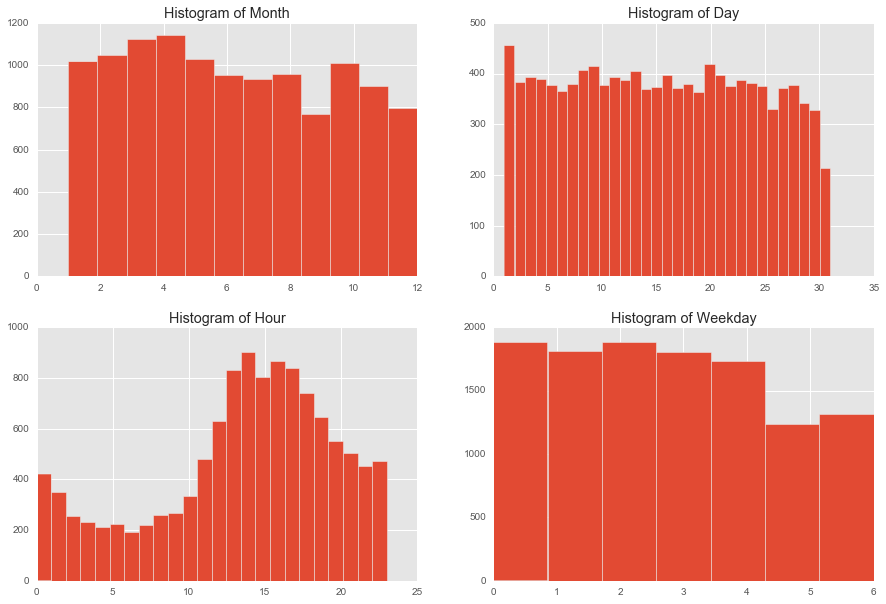

In [12]:
index =0 
f, axarr = plt.subplots(2, 2, figsize=(15,10))
times = ['Month', 'Day', 'Hour', 'Weekday']
bins = [12, 31, 24, 7]
index = 0
for i in range(2):
    for j in range(2):
        axarr[i, j].hist(memes[times[index]], bins = bins[index])
        axarr[i, j].set_title('Histogram of {}'.format(times[index]))
        index += 1

f.subplots_adjust(hspace=0.2)

Итак, что тут есть интересного:
- На гистограмме месяца есть небольшой провал в сентябре (возможно, у основной аудитории в этот месяц начинаются уроки)
- День ничего необычного не принес, распределено достаточно равномерно
- Гистограмма часа достаточно показательная - в ночной период активность значительно снижается, а затем растет, достигая пика примерно после уроков
- По дням недели есть заметное снижения на выходных, интересно, почему бы это

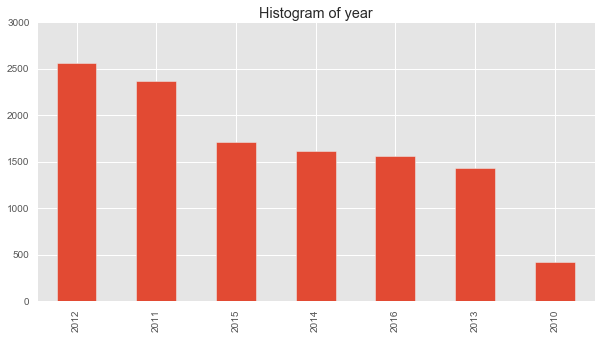

In [13]:
memes.Year.value_counts().plot(kind='bar', figsize=(10, 5))
plt.title("Histogram of year")
plt.show()

In [14]:
memes.Year.value_counts(normalize=True).apply(lambda x: "{}%".format(str(round(x, 3)*100)))

2012    21.9%
2011    20.3%
2015    14.7%
2014    13.9%
2016    13.4%
2013    12.3%
2010     3.6%
Name: Year, dtype: object

Похоже, 2011 и 2012 были расцветом для мемов, 42% от всего их количества на сайте были добавлены в эти два года.

# Год появления первоисточника

Посмотрим также на вторую переменную, связанную с годом - год появления первоисточника `year`

In [15]:
memes.year.value_counts()[:10]

2011           1670
2012           1238
Unknown         881
2010            597
2013            581
NSFW            541
2014            529
2016            406
Researching     383
2015            343
Name: year, dtype: int64

К сожалению, сюда затесалось несколько тэгов, придется очистить переменную от них, попутно добавив эти значения в переменную `tags`

In [16]:
def clearYear(year):
    if not year.isdigit():
        return np.NaN, ' '+year
    else:
        return int(year), ''

In [17]:
years, tags = zip(*memes.year.apply(lambda x: clearYear(x)))
memes.year = years
memes.tags += tags

In [18]:
memes.year.describe()

count    7218.000000
mean     2007.279163
std        40.585179
min      1000.000000
25%      2009.000000
50%      2011.000000
75%      2013.000000
max      2916.000000
Name: year, dtype: float64

Отлично! Теперь переменная очищена от текстовых значений, минимальное значение у нас 1000, максимальное - 2196, что очень похоже на опечатку в "2016"

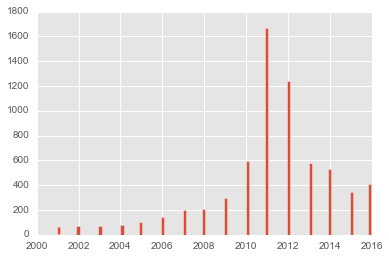

In [19]:
memes.year[(memes.year>2000)&(memes.year<2020)].hist(bins=100)
plt.show()

Немного ограничив временные рамки можно выяснить, что 2011 и 2012 стали первоисточниками для наибольшего числа мемов

Можем посмотреть на наиболее "исторические" мемы, берущие своё начало, например, до 1500 года

In [20]:
ancient = memes[memes.year<1500]
for i in ancient.index.tolist():
    print("Name: {}".format(ancient.loc[i, "name"]))
    print("Year: {}".format(ancient.loc[i, "year"]))
    print("About:\n{}".format(ancient.loc[i, "about"]))
    print("==================================================================\n")

Name: Tutankhamun
Year: 1341.0
About:
Tutankhamun (lit. translation, Living Image of Amun) was an ancient Egyptian pharaoh who rose to power and control of Egypt at the age of 10 and ruled for approximately 8 years before his death in 1323 B.C. at the age of 18 or 19 years old. Because of this, as well as the circumstances surrounding the excavation of his tomb lead by Howard Carter in 1922, and what has been discovered since his tomb’s discovery, he has become famous around the world for being the subject of one of the world’s most in-depth excavations and ongoing archaeological mysteries.

Name: Foxes
Year: 1000.0
About:
Foxes are omnivorous members of the Canidae family, a lineage of carnivorous mammals that also includes dogs, wolves and jackals. Foxes are found on every continent except Antarctica, with the most common species being the red fox (Vulpes vulpes) and its 47 recognized sub-species.

Name: Katana
Year: 1392.0
About:
Katana are traditional Japanese swords originally wie

К сожалению, не у всех есть описание, но в целом понятно, откуда взялись такие древние годы происхождения - создание первой катаны в Японии, битва при Гастингсе в 1066 году, Витрувианский человек и Последняя вечеря Леонардо да Винчи 1490 и 1495 годы соответственно. Откуда только не черпают вдохновение создатели мемчиков

# Число просмотров

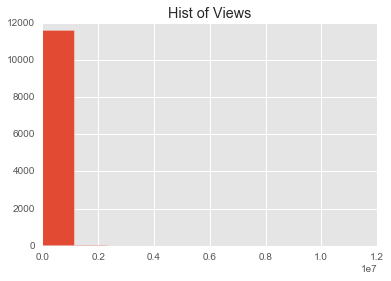

In [21]:
memes.views[memes.views>0].hist(bins=10)
plt.title("Hist of Views")
plt.show()

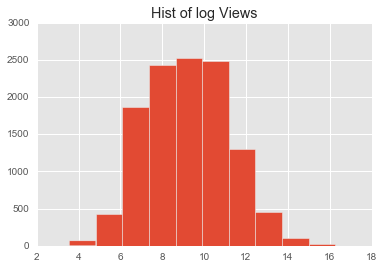

In [22]:
memes.views[memes.views>0].apply(np.log).hist(bins=10)
plt.title("Hist of log Views")
plt.show()

# Популярность

Метрикой популярности, в данном случае, будет оценка среднего числа просмотров в день. Для этого разделим фактическое число просмотров на число дней, прошедших со дня публикации.

In [23]:
memes['average_views'] = memes.views/memes.days_from_creation

In [24]:
memes.average_views[memes.name=="#DrunkHillary"] = 2568 # самый молодой мем, пока что дней с его создания прошло ровно 0,
                                                        # поэтому присваиваем среднему число просмотров фактическое

### Посмотрим на самые популярные!

In [25]:
popular = memes.sort_values(by='average_views', ascending=False)
for i in popular.index.tolist()[:7]:
    print('Meme name: ')
    print(popular.loc[i,'name'])
    print("Average views (per day) {}".format(round(popular.loc[i,'average_views'])))
    print('==============\n')

Meme name: 
Harambe the Gorilla
Average views (per day) 14441.0

Meme name: 
Dat Boi
Average views (per day) 13750.0

Meme name: 
Ken Bone
Average views (per day) 11085.0

Meme name: 
Doge
Average views (per day) 9611.0

Meme name: 
Describe Yourself in 3 Fictional Characters
Average views (per day) 7528.0

Meme name: 
Hugh Mungus
Average views (per day) 6872.0

Meme name: 
( ͡° ͜ʖ ͡°) / Lenny Face
Average views (per day) 6747.0



Горила [Harambe](http://knowyourmeme.com/memes/harambe-the-gorilla) лидирует - слишком эмоциональный мем получился. Хотя Doge тоже есть в числе лидеров!

# Комментарии

In [26]:
memes.comments[~memes.comments.apply(lambda x: x.isdigit())][:10]

9      1 Comment">\n<a href="/memes/sombra#comments" ...
10     1 Comment">\n<a href="/memes/subcultures/pokem...
36     1 Comment">\n<a href="/memes/cajama#comments" ...
56     1 Comment">\n<a href="/memes/spinnyboiz#commen...
65     1 Comment">\n<a href="/memes/finally-i-can-exp...
71     1 Comment">\n<a href="/memes/mr-hudson#comment...
117    1 Comment">\n<a href="/memes/wallace-and-gromi...
118    1 Comment">\n<a href="/memes/worm-on-a-string#...
120    1 Comment">\n<a href="/memes/slondermon#commen...
122    1 Comment">\n<a href="/memes/harambe-s-son-and...
Name: comments, dtype: object

Снова придется немного почистить - в комментарии закрался HTML

In [27]:
memes.comments[~memes.comments.apply(lambda x: x.isdigit())] = 1
memes.comments = memes.comments.astype(int)

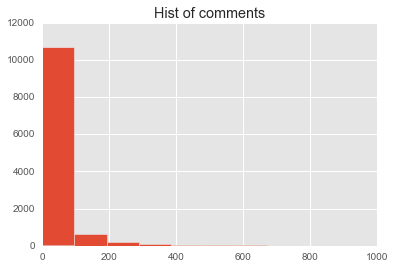

In [28]:
memes.comments.hist()
plt.title("Hist of comments")
plt.show()

### Посмотрим на самые комментируемые

In [29]:
memes['average_comments'] = memes.comments/memes.days_from_creation

In [30]:
memes.average_comments[memes.name == "#DrunkHillary"] = memes.comments[memes.name == "#DrunkHillary"]

In [31]:
popular = memes.sort_values(by='average_comments', ascending=False)
for i in popular.index.tolist()[:7]:
    print('Meme name: ')
    print(popular.loc[i,'name'])
    print("Average comments (per day) {}".format(round(popular.loc[i,'average_comments'])))
    print('==============\n')

Meme name: 
#SpiritCooking
Average comments (per day) 50.0

Meme name: 
#DrunkHillary
Average comments (per day) 29.0

Meme name: 
AmourShipping
Average comments (per day) 16.0

Meme name: 
#ScienceMustFall
Average comments (per day) 16.0

Meme name: 
Last Time The Cubs Won the World Series
Average comments (per day) 15.0

Meme name: 
Vote From Home
Average comments (per day) 14.0

Meme name: 
"On November 9th..."
Average comments (per day) 12.0



# Статус

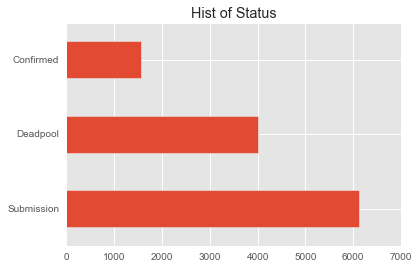

In [32]:
memes.status.value_counts().plot(kind='barh')
plt.title("Hist of Status")
plt.show()

А вот здесь можно попутно решить еще и задачку множественной классификации - для каждого мема есть три состояния:
- Submission - добавлен недавно или не еще не стал "признанным" в сообществе
- Deadpool - если умер и не используется
- Confirmed - активно используется и получил статус "подтвержденного" мема

---

Что ж, по всем переменным первично прошлись, далее необходимо будет перевести текст во что-то более удобоваримое, например, tf-idf форму, а названия вполне можно прогнать через word2vec и посмотреть, что получится, если от Doge отнять Harambe ;)